Purpose: To make violin plots of scores (accuracy, F1 stressed, F1 control) for single-stressor random forest models (leave-one-BioProject-out approach).<br>
Author: Anna Pardo<br>
Date initiated: Oct. 18, 2023

In [1]:
# import modules
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [2]:
# set the directory
d = "../../data/rf_outputs/single_stressor_RFs/"

In [3]:
# set up a dict to manually alter names of stressors
snames = {"salt":"Salt","drought":"Drought","lownitrogen":"Low_Nitrogen","cold":"Cold","flood":"Flooding","heat":"Heat"}

In [4]:
# pull scores files into one big dictionary
scores = {}
for subd in os.listdir(d):
    s = subd.strip().split("_")[0]
    st = snames[s]
    scores[st] = {}
    for ssd in os.listdir(d+subd):
        b = ssd.strip().split("_T")[0]
        for f in os.listdir(d+subd+"/"+ssd):
            if f.endswith("_scores.json"):
                scores[st][b] = json.load(open(d+subd+"/"+ssd+"/"+f))

In [6]:
# recall that for F1, precision, recall, etc., class 0=control, class 1=stressed
# make a dataframe of scores
# columns should include: Stressor, BioProject, Accuracy, F1_control, F1_stressed

def make_stressor_df(stressor):
    df = pd.DataFrame(scores[stressor]).transpose().reset_index().rename(columns={"index":"BioProject"})
    df["Stressor"] = stressor
    return df

In [7]:
sdf = make_stressor_df("Salt")
lndf = make_stressor_df("Low_Nitrogen")
hdf = make_stressor_df("Heat")
cdf = make_stressor_df("Cold")
fdf = make_stressor_df("Flooding")
ddf = make_stressor_df("Drought")

In [8]:
dflist = [sdf,lndf,hdf,cdf,fdf,ddf]
alldf = pd.concat(dflist)

In [9]:
alldf.head()

,BioProject,Accuracy,F1_class_0,F1_class_1,Precision_class_0,Precision_class_1,Recall_class_0,Recall_class_1,AUC,Stressor
0,PRJNA647980,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.0,1.000000,Salt
1,PRJNA794297,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.0,1.000000,Salt
2,PRJNA414300,0.916667,0.909091,0.923077,1.0,0.857143,0.833333,1.0,0.916667,Salt
3,PRJNA290180,0.250000,0.000000,0.400000,0.0,0.333333,0.000000,0.5,0.500000,Salt
4,PRJNA244661,0.750000,0.800000,0.666667,1.0,0.500000,0.666667,1.0,1.000000,Salt


In [10]:
alldf

,BioProject,Accuracy,F1_class_0,F1_class_1,Precision_class_0,Precision_class_1,Recall_class_0,Recall_class_1,AUC,Stressor
0,PRJNA647980,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,Salt
1,PRJNA794297,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,Salt
2,PRJNA414300,0.916667,0.909091,0.923077,1.000000,0.857143,0.833333,1.000000,0.916667,Salt
3,PRJNA290180,0.250000,0.000000,0.400000,0.000000,0.333333,0.000000,0.500000,0.500000,Salt
4,PRJNA244661,0.750000,0.800000,0.666667,1.000000,0.500000,0.666667,1.000000,1.000000,Salt
0,Brandon_Webster,0.550459,0.588235,0.505051,0.538462,0.568182,0.648148,0.454545,0.606397,Low_Nitrogen
1,PRJNA420600,0.900000,0.888889,0.909091,0.800000,1.000000,1.000000,0.833333,1.000000,Low_Nitrogen
2,PRJNA436973,0.750000,0.666667,0.800000,1.000000,0.666667,0.500000,1.000000,1.000000,Low_Nitrogen
3,PRJNA304223,0.437500,0.181818,0.571429,0.333333,0.461538,0.125000,0.750000,0.562500,Low_Nitrogen
4,PRJNA587226,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Low_Nitrogen


<AxesSubplot: xlabel='Stressor', ylabel='Accuracy'>

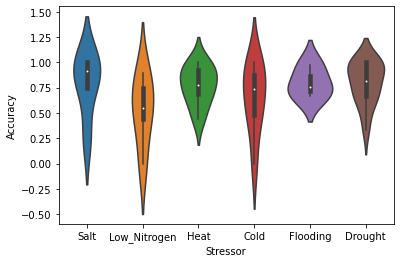

In [11]:
# violin plot of accuracy score
sns.violinplot(x="Stressor",y="Accuracy",data=alldf)

<AxesSubplot: xlabel='Stressor', ylabel='Accuracy'>

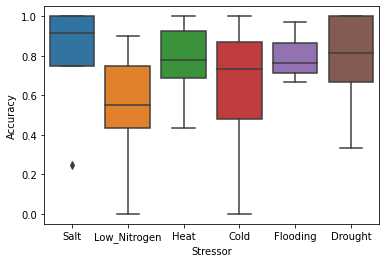

In [12]:
sns.boxplot(x="Stressor",y="Accuracy",data=alldf)

In [30]:
alldf.head()

,BioProject,Accuracy,F1_class_0,F1_class_1,Precision_class_0,Precision_class_1,Recall_class_0,Recall_class_1,AUC,Stressor
0,PRJNA647980,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.0,1.000000,Salt
1,PRJNA794297,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.0,1.000000,Salt
2,PRJNA414300,0.916667,0.909091,0.923077,1.0,0.857143,0.833333,1.0,0.916667,Salt
3,PRJNA290180,0.250000,0.000000,0.400000,0.0,0.333333,0.000000,0.5,0.500000,Salt
4,PRJNA244661,0.750000,0.800000,0.666667,1.0,0.500000,0.666667,1.0,1.000000,Salt


In [13]:
# set up another dataframe for just F1, indicating whether stressed or control in a separate column
bp = []
f1 = []
sc = []
st = []
for i in range(len(alldf.index)):
    f1.append(alldf.iloc[i,2])
    f1.append(alldf.iloc[i,3])
    bp.append(alldf.iloc[i,0])
    bp.append(alldf.iloc[i,0])
    sc.append("Control")
    sc.append("Stressed")
    st.append(alldf.iloc[i,9])
    st.append(alldf.iloc[i,9])
    
f1df = pd.DataFrame(list(zip(bp,f1,sc,st)),columns=["BioProject","F1","Treatment","Stressor"])

<AxesSubplot: xlabel='Stressor', ylabel='F1'>

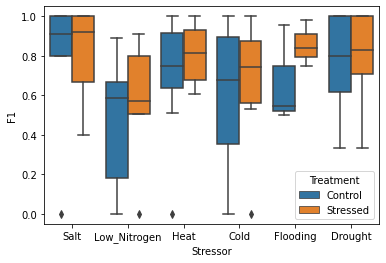

In [14]:
# make boxplot for F1
sns.boxplot(x="Stressor",y="F1",hue="Treatment",data=f1df)

<AxesSubplot: xlabel='Stressor', ylabel='AUC'>

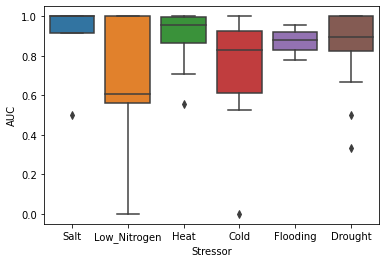

In [15]:
# make boxplot for AUC
sns.boxplot(x="Stressor",y="AUC",data=alldf)